### Import libraries





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from pandas_profiling import ProfileReport
%matplotlib inline



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import dataset 

In [ ]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [ ]:
X_train_transformed = df_train.drop(['RainTomorrow'], axis=1)
y_train = df_train['RainTomorrow']
X_test_transformed = df_test.drop(['RainTomorrow'], axis=1)
y_test = df_test['RainTomorrow']

### Evaluation

##### Classification report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
best_logistic_clf = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
best_svm_clf = SVC(kernel='poly', degree=2, gamma='scale', C=1, random_state=0)
best_tree_clf = DecisionTreeClassifier(max_depth=8, random_state=0)

In [ ]:
_ = best_logistic_clf.fit(X_train_transformed, y_train)
# _ = best_svm_clf.fit(X_train_transformed, y_train)
_ = best_tree_clf.fit(X_train_transformed, y_train)

In [ ]:
# with open('best_svm.pkl', 'wb') as f:
#     pickle.dump(best_svm_clf, f)

In [ ]:
with open('best_svm.pkl', 'rb') as f:
    best_svm_clf = pickle.load(f)

In [ ]:
best_svm_clf

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_log = best_logistic_clf.predict(X_test_transformed)
y_pred_svm = best_svm_clf.predict(X_test_transformed)
y_pred_tree = best_tree_clf.predict(X_test_transformed)

In [ ]:
# target_names = ['No', 'Yes']
print('Logistic Regression report:')
print(classification_report(y_test, y_pred_log))
print('-'*50)
print('SVM report:')
print(classification_report(y_test, y_pred_svm))
print('-'*50)
print('Decision Tree report:')
print(classification_report(y_test, y_pred_tree))
print('-'*50)

Logistic Regression report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22067
           1       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

--------------------------------------------------
SVM report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22067
           1       0.79      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439

--------------------------------------------------
Decision Tree report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22067
           1       0.73      0.46      0.57      6372

    accuracy      

##### Confusion Matrix

Logistic Regression confusion matrix:


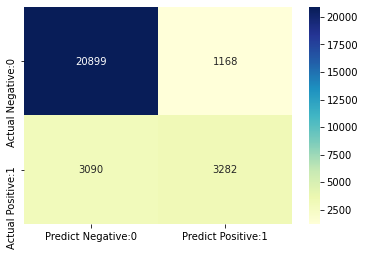

In [ ]:
#confusion matrix
print('Logistic Regression confusion matrix:')
cm_log = confusion_matrix(y_test, y_pred_log)
# visualize confusion matrix with seaborn heatmap
cm_log_matrix = pd.DataFrame(data=cm_log, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_log_matrix, annot=True, fmt='d', cmap='YlGnBu')



SVM confusion matrix:


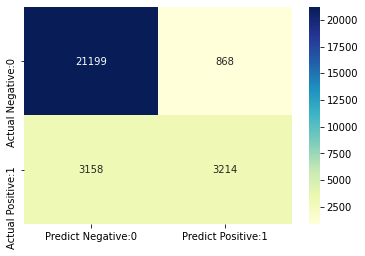

In [ ]:

print('SVM confusion matrix:')
cm_svm = confusion_matrix(y_test, y_pred_svm)
# visualize confusion matrix with seaborn heatmap
cm_svm_matrix = pd.DataFrame(data=cm_svm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_svm_matrix, annot=True, fmt='d', cmap='YlGnBu')


Decision Tree confusion matrix:


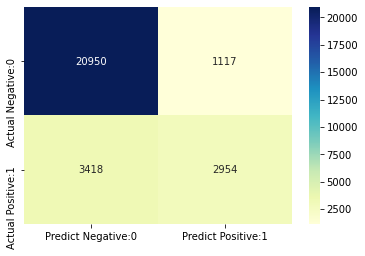

In [ ]:
print('Decision Tree confusion matrix:')
cm_tree = confusion_matrix(y_test, y_pred_tree)
# visualize confusion matrix with seaborn heatmap
cm_tree_matrix = pd.DataFrame(data=cm_tree, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_tree_matrix, annot=True, fmt='d', cmap='YlGnBu')


##### Misclassified examples analysis

In [ ]:
X_test_pos = X_test.iloc[np.where(y_test == 1)[0]]
X_test_neg = X_test.iloc[np.where(y_test == 0)[0]]

In [ ]:
X_test_pos.shape, X_test_neg.shape 

((6372, 118), (22067, 118))

In [ ]:
#logistic predictions
log_pos_pred_idx = np.where(y_pred_log == 1)[0]
log_negative_pred_idx = np.where(y_pred_log == 0)[0]
log_false_pos_pred_idx = np.where(y_test[log_pos_pred_idx] == 0)[0]
log_false_neg_pred_idx = np.where(y_test[log_negative_pred_idx] == 1)[0]

#svm predictions
svm_pos_pred_idx = np.where(y_pred_svm == 1)[0]
svm_negative_pred_idx = np.where(y_pred_svm == 0)[0]
svm_false_pos_pred_idx = np.where(y_test[svm_pos_pred_idx] == 0)[0]
svm_false_neg_pred_idx = np.where(y_test[svm_negative_pred_idx] == 1)[0]

#decision tree
tree_pos_pred_idx = np.where(y_pred_tree == 1)[0]
tree_negative_pred_idx = np.where(y_pred_tree == 0)[0]
tree_false_pos_pred_idx = np.where(y_test[tree_pos_pred_idx] == 0)[0]
tree_false_neg_pred_idx = np.where(y_test[tree_negative_pred_idx] == 1)[0]

In [ ]:
#logistic 
X_test_log_false_pos = X_test.iloc[log_false_pos_pred_idx]
X_test_log_false_neg = X_test.iloc[log_false_neg_pred_idx]

#decision tree 
X_test_tree_false_pos = X_test.iloc[tree_false_pos_pred_idx]
X_test_tree_false_neg = X_test.iloc[tree_false_neg_pred_idx]

#svm
X_test_svm_false_pos = X_test.iloc[svm_false_pos_pred_idx]
X_test_svm_false_neg = X_test.iloc[svm_false_neg_pred_idx]

In [ ]:
from sklearn.inspection import permutation_importance
# feature importance logistic
log_feat_importance = permutation_importance(best_logistic_clf, X_test_transformed, y_test, n_jobs = -1, random_state=0)
for i in log_feat_importance.importances_mean.argsort()[::-1][:10]:
    print(f"{X_test.columns[i]:<8} "
        f"{log_feat_importance.importances_mean[i]:.3f}")

Humidity3pm 0.075
Pressure3pm 0.047
WindGustSpeed 0.028
Pressure9am 0.015
Rainfall 0.007
MaxTemp  0.006
Sunshine 0.005
Cloud3pm 0.004
WindSpeed3pm 0.002
Location_Wollongong 0.001


In [ ]:
log_important_cols = X_test.columns[log_feat_importance.importances_mean.argsort()[::-1][:9]].values.tolist()

In [ ]:
log_important_cols

['Humidity3pm',
 'Pressure3pm',
 'WindGustSpeed',
 'Pressure9am',
 'Rainfall',
 'MaxTemp',
 'Sunshine',
 'Cloud3pm',
 'WindSpeed3pm']

In [ ]:
X_test_log_false_pos.shape, X_test_log_false_neg.shape

((1168, 118), (3090, 118))

Plot the distribution of false positive examples (misclassified negative examples) and positive examples to see similarities

In [ ]:
false_pos_label = 'False Positive'
pos_label = 'Positive'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


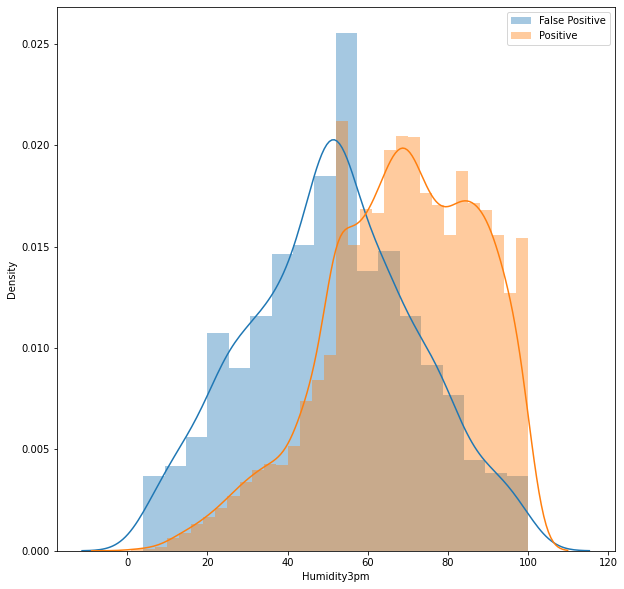

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Humidity3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Humidity3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


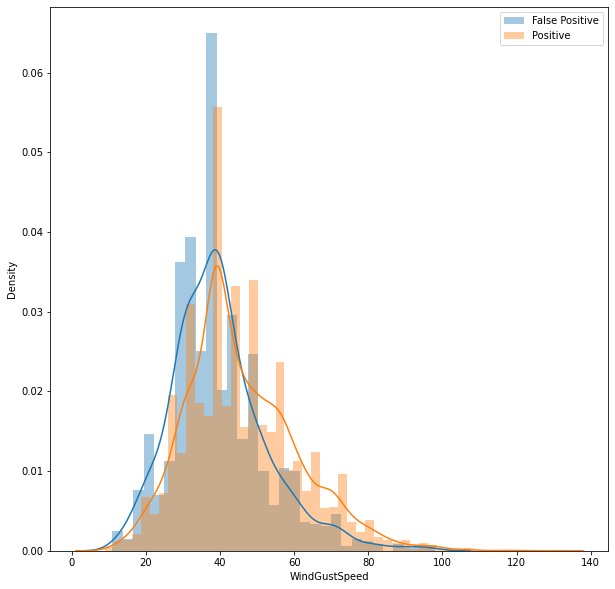

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['WindGustSpeed'], label=false_pos_label)
sns.distplot(X_test_pos['WindGustSpeed'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


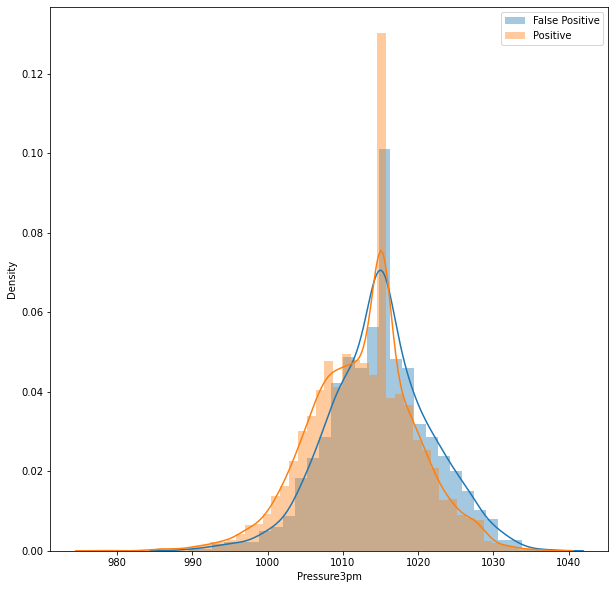

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Pressure3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Pressure3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


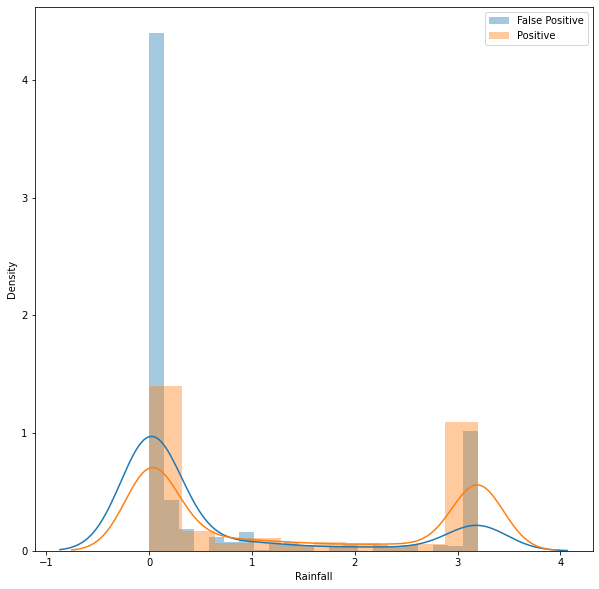

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Rainfall'], label=false_pos_label)
sns.distplot(X_test_pos['Rainfall'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


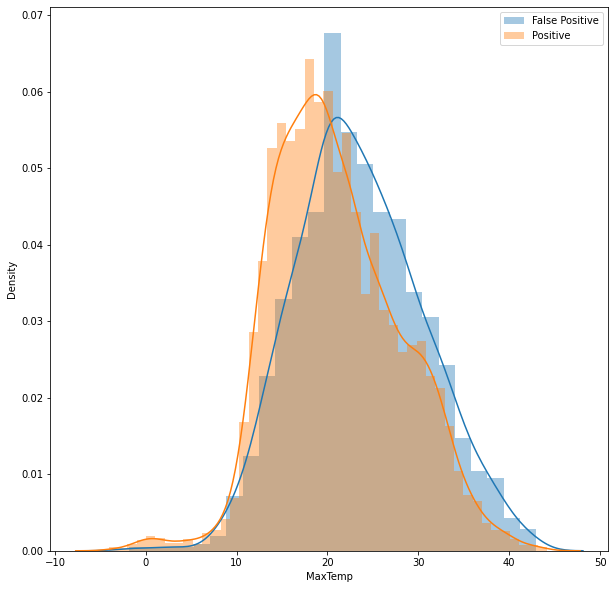

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['MaxTemp'], label=false_pos_label)
sns.distplot(X_test_pos['MaxTemp'], label=pos_label)
plt.legend()

Plot the distribution of false negative examples (misclassified negative examples) and positive examples to see similarities

In [ ]:
false_neg_label = 'False Negative'
neg_label = 'Negative'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


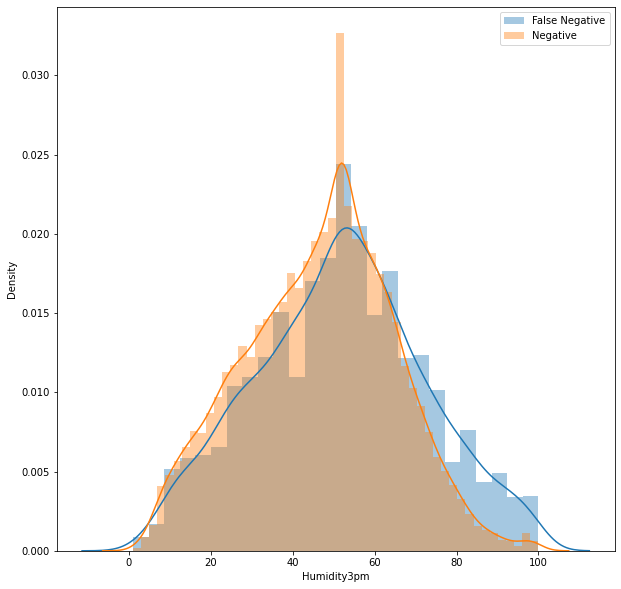

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['Humidity3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Humidity3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


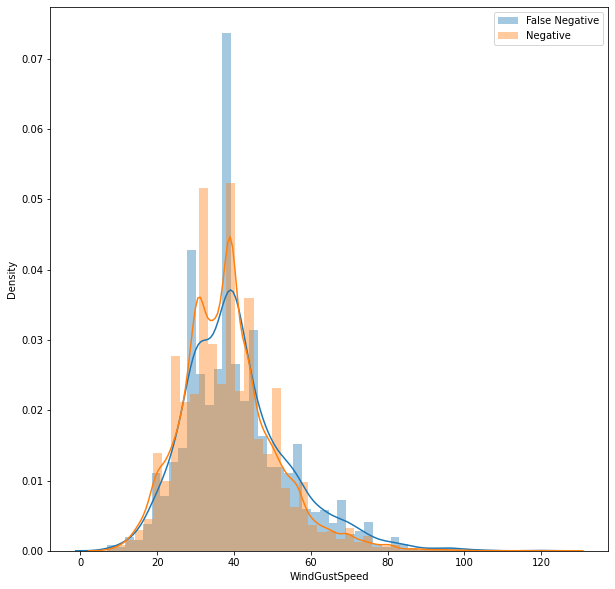

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['WindGustSpeed'], label=false_neg_label)
sns.distplot(X_test_neg['WindGustSpeed'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


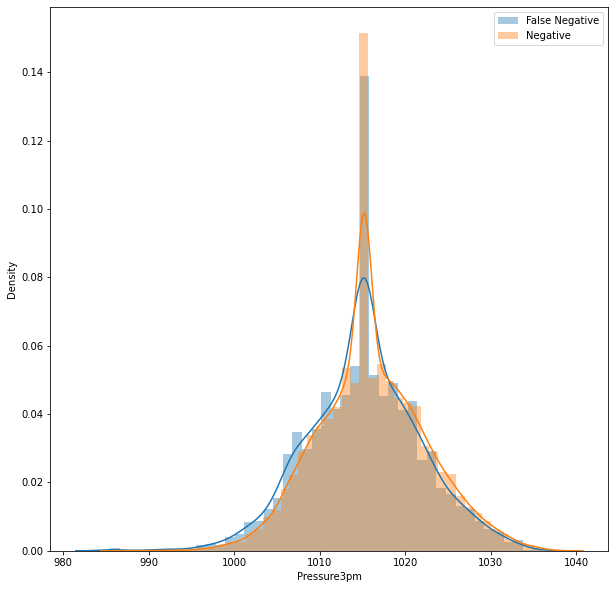

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['Pressure3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Pressure3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


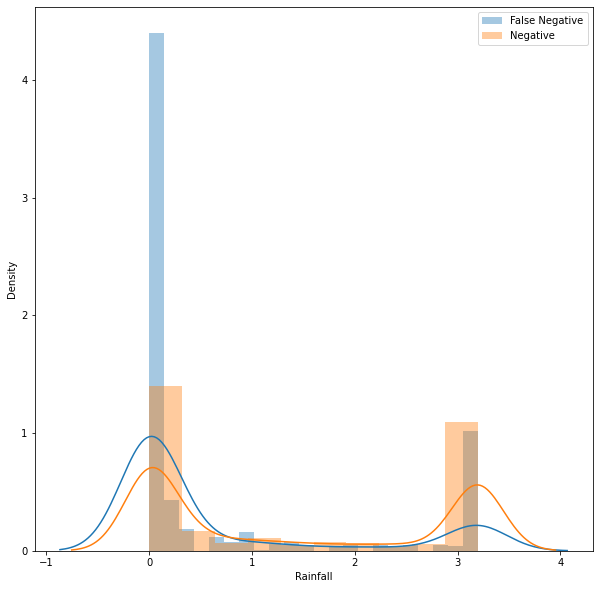

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_pos['Rainfall'], label=false_neg_label)
sns.distplot(X_test_pos['Rainfall'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


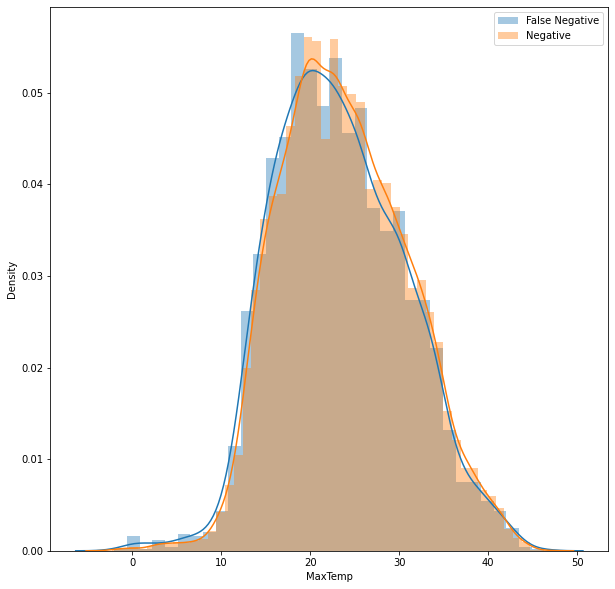

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_log_false_neg['MaxTemp'], label=false_neg_label)
sns.distplot(X_test_neg['MaxTemp'], label=neg_label)
plt.legend()

In [ ]:
# important features for decision tree
for i in best_tree_clf.feature_importances_.argsort()[::-1][:10]:
         print(f"{X_test.columns[i]:<8} "
               f"{best_tree_clf.feature_importances_[i]:.3f}")

Humidity3pm 0.652
WindGustSpeed 0.098
Pressure3pm 0.072
Sunshine 0.057
Rainfall 0.045
Temp9am  0.014
Cloud3pm 0.010
Humidity9am 0.008
WindSpeed3pm 0.006
MaxTemp  0.006


Visualize tree plots to see similarities between misclassified examples and misclassified class distribution

In [ ]:
tree_important_cols = X_test.columns[best_tree_clf.feature_importances_.argsort()[::-1][:10]].values.tolist()

In [ ]:
tree_important_cols

['Humidity3pm',
 'WindGustSpeed',
 'Pressure3pm',
 'Sunshine',
 'Rainfall',
 'Temp9am',
 'Cloud3pm',
 'Humidity9am',
 'WindSpeed3pm',
 'MaxTemp']

False postive examples

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


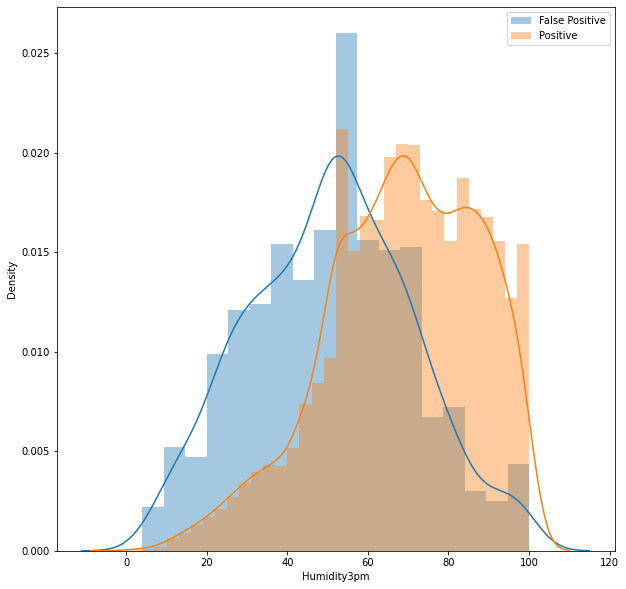

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Humidity3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Humidity3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


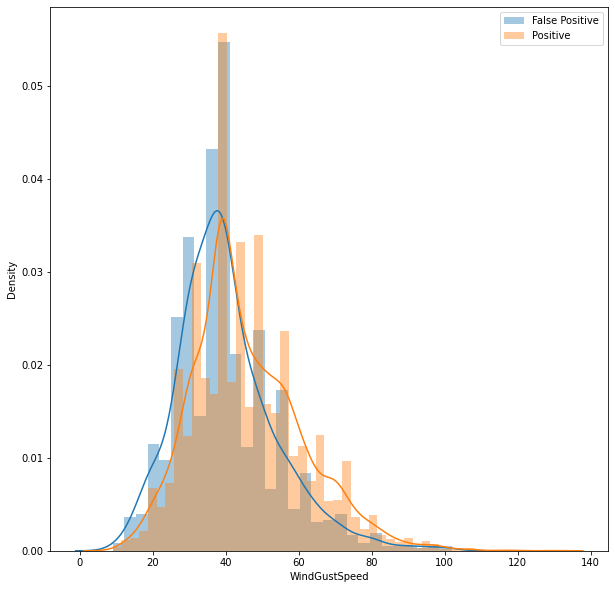

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['WindGustSpeed'], label=false_pos_label)
sns.distplot(X_test_pos['WindGustSpeed'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


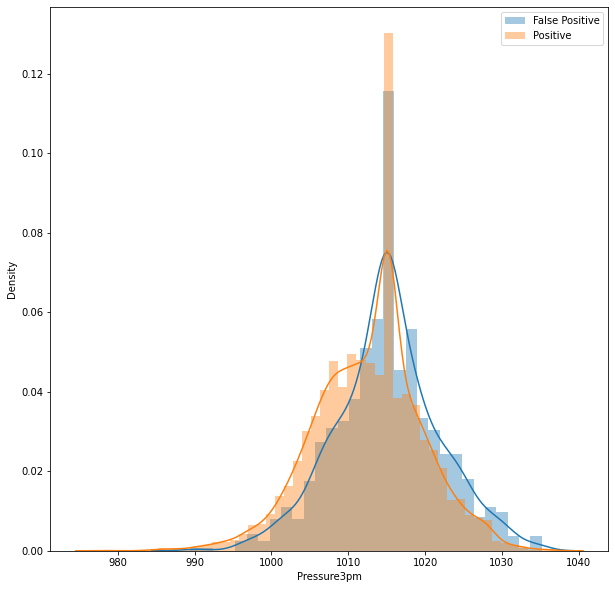

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Pressure3pm'], label=false_pos_label)
sns.distplot(X_test_pos['Pressure3pm'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


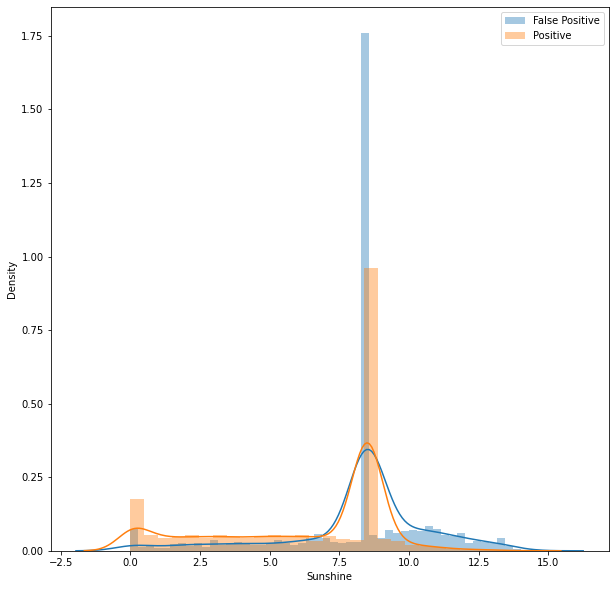

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Sunshine'], label=false_pos_label)
sns.distplot(X_test_pos['Sunshine'], label=pos_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


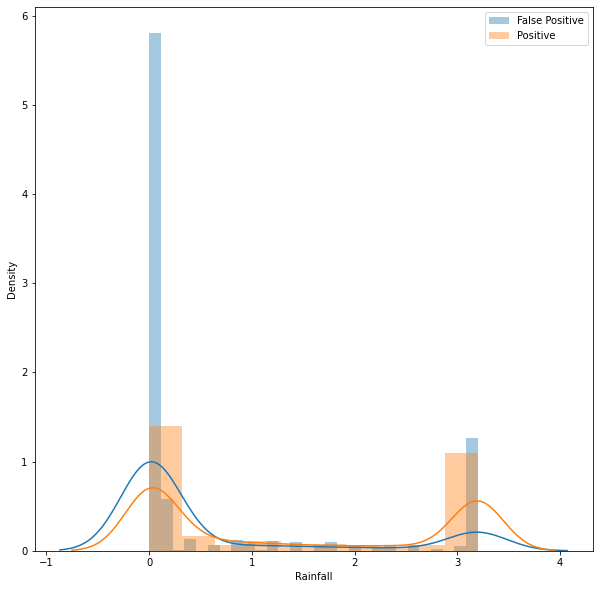

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_pos['Rainfall'], label=false_pos_label)
sns.distplot(X_test_pos['Rainfall'], label=pos_label)
plt.legend()

False Negative Examples

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


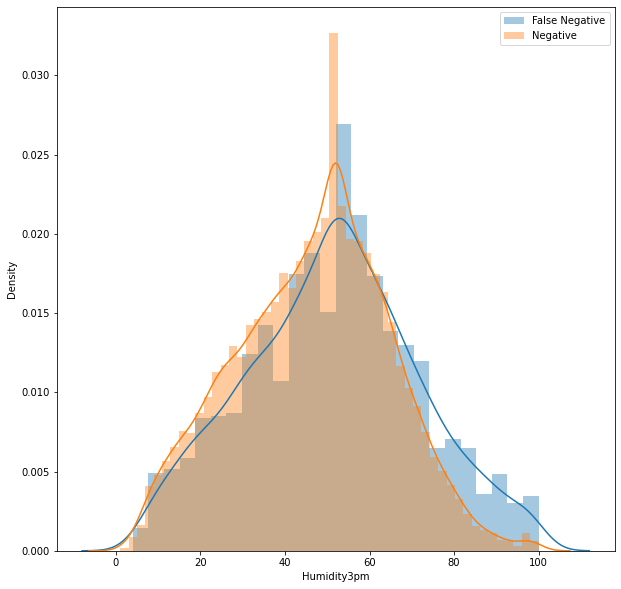

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Humidity3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Humidity3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


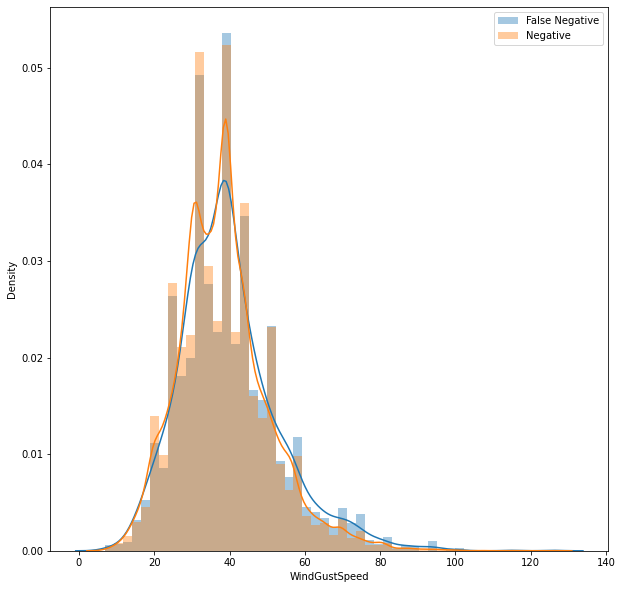

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['WindGustSpeed'], label=false_neg_label)
sns.distplot(X_test_neg['WindGustSpeed'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


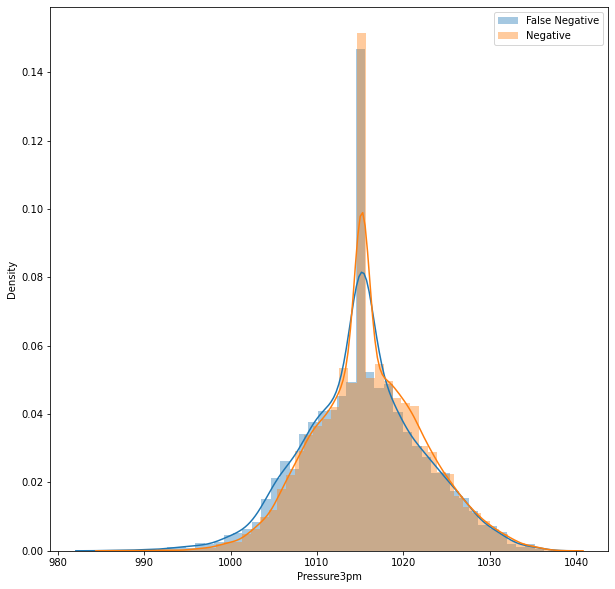

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Pressure3pm'], label=false_neg_label)
sns.distplot(X_test_neg['Pressure3pm'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


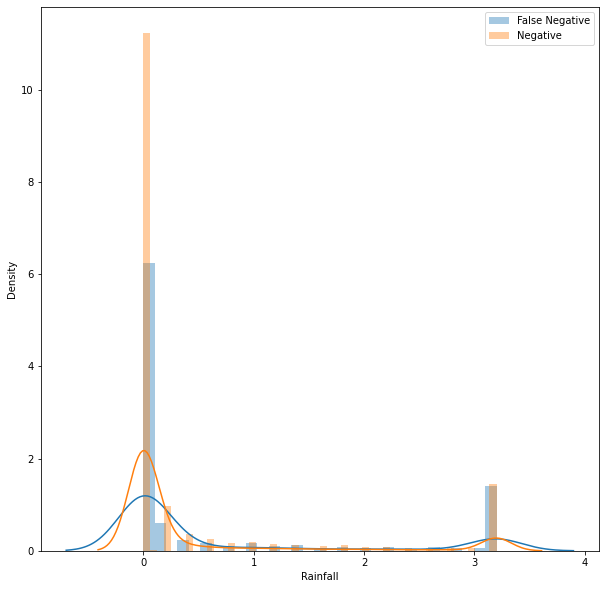

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Rainfall'], label=false_neg_label)
sns.distplot(X_test_neg['Rainfall'], label=neg_label)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


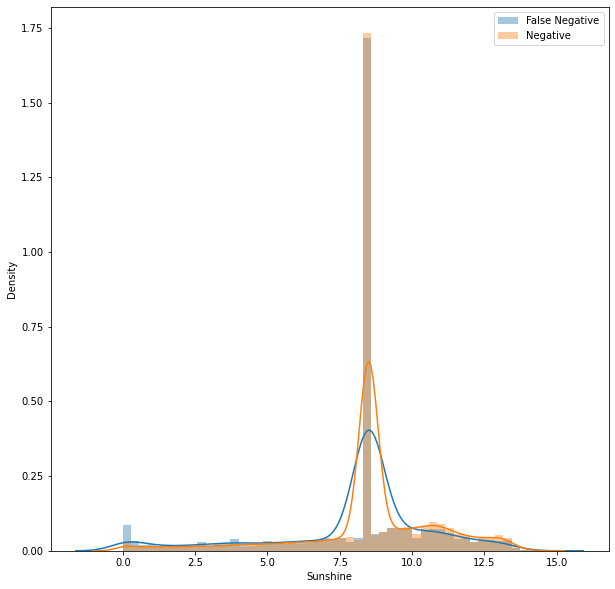

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(X_test_tree_false_neg['Sunshine'], label=false_neg_label)
sns.distplot(X_test_neg['Sunshine'], label=neg_label)
plt.legend()

In [ ]:
# svm feature importance 
svm_feat_importance = permutation_importance(best_svm_clf, X_test_transformed, y_test, n_repeats=3, n_jobs = -1, random_state=0)


#### Logistic Regression

##### Evaluate on resampled data

In [ ]:
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import os 
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support

In [ ]:
datasets = os.listdir('datasets')

In [ ]:
datasets

['X_train_ros_11.npy',
 'y_train_ros_11.npy',
 'X_train_ros_34.npy',
 'y_train_ros_34.npy',
 'X_train_ros_23.npy',
 'y_train_ros_23.npy',
 'X_train_ros_12.npy',
 'y_train_ros_12.npy',
 'X_train_smote_11.npy',
 'y_train_smote_11.npy',
 'X_train_smote_34.npy',
 'y_train_smote_34.npy',
 'X_train_smote_23.npy',
 'y_train_smote_23.npy',
 'X_train_smote_12.npy',
 'y_train_smote_12.npy',
 'X_train_rus_11.npy',
 'y_train_rus_11.npy',
 'X_train_rus_34.npy',
 'y_train_rus_34.npy',
 'X_train_rus_23.npy',
 'y_train_rus_23.npy',
 'X_train_rus_12.npy',
 'y_train_rus_12.npy',
 'X_train_tomek.npy',
 'y_train_tomek.npy',
 'X_train_enn_all.npy',
 'y_train_enn_all.npy',
 'X_train_origin.csv']

In [ ]:
os.listdir(SAVE_DIR)

['logistic_C_1000.pkl',
 'logistic_C_10000.pkl',
 'logistic_C_100.pkl',
 'logistic_C_10.pkl',
 'logistic_C_0.001.pkl',
 'logistic_C_0.01.pkl',
 'logistic_C_1.pkl',
 'logistic_C_0.0001.pkl',
 'logistic_C_0.1.pkl',
 'logistic_C_0.5.pkl',
 'logistic_C_0.0005.pkl',
 'logistic_C_0.005.pkl',
 'logistic_C_0.05.pkl',
 'best_model.pkl']

In [ ]:
SAVE_DIR = 'grid_search_logistic'
with open(os.path.join(SAVE_DIR, 'best_model.pkl'), 'rb') as f:
    best_log_clf = pickle.load(f)

In [ ]:
best_log_clf

{'fit_time': 7.019522190093994,
 'model': LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'train_score': 0.8475654648747843,
 'validation_score': 0.8474352775702166}

In [ ]:
original_log_clf = LogisticRegression()
original_log_clf.set_params(**best_log_clf['model'].get_params())

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
_ = original_log_clf.fit(X_train_transformed, y_train)
y_pred = original_log_clf.predict(X_test_transformed)
original_log_score = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
original_log_score

(array([0.87119096, 0.73752809]),
 array([0.94707029, 0.51506591]),
 array([0.90754733, 0.60654223]),
 array([22067,  6372]))

In [ ]:
iter = ['original', '1-2', '2-3', '3-4','1-1']

(array([0.89510175, 0.64910872]), array([0.90098337, 0.63433773]), array([0.89803293, 0.64163823]), array([22067,  6372]))
(array([0.90938511, 0.6015888 ]), array([0.86590837, 0.70119272]), array([0.88711437, 0.64758316]), array([22067,  6372]))
(array([0.91504226, 0.58130489]), array([0.84877872, 0.72708726]), array([0.88066579, 0.64607447]), array([22067,  6372]))
(array([0.92745489, 0.53216   ]), array([0.80124167, 0.78295669]), array([0.85974083, 0.6336445 ]), array([22067,  6372]))


Text(0.5, 1.0, 'Random OverSample')

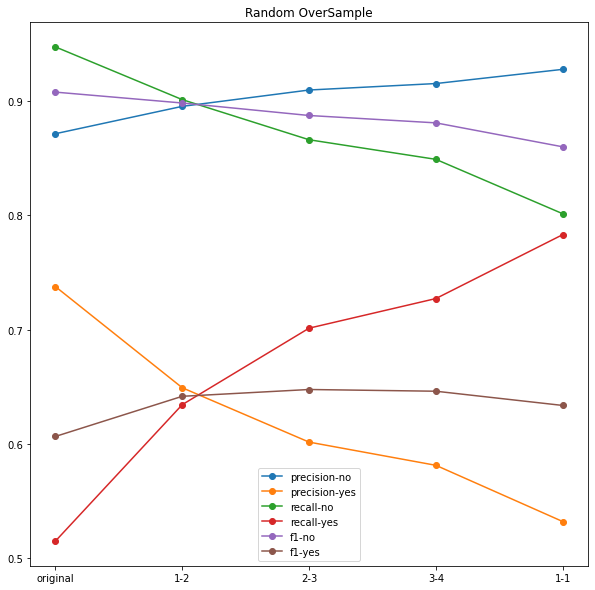

In [ ]:
precisons1_log_over = []
precisons0_log_over = []
recalls1_log_over = []
recalls0_log_over = []
f1s1_log_over = []
f1s0_log_over = []
precisons0_log_over.append(original_log_score[0][0])
precisons1_log_over.append(original_log_score[0][1])
recalls0_log_over.append(original_log_score[1][0])
recalls1_log_over.append(original_log_score[1][1])
f1s0_log_over.append(original_log_score[2][0])
f1s1_log_over.append(original_log_score[2][1])
for i in range(3,-1, -1):
    X_train_resampled = np.load('datasets/{}'.format(datasets[i*2]))
    y_train_resampled = np.load('datasets/{}'.format(datasets[i*2+1]))
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)
    # model = resampled_models[i][1]
    # print(resampled_models[i][0])
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_log_over.append(score[0][0])
    precisons1_log_over.append(score[0][1])
    recalls0_log_over.append(score[1][0])
    recalls1_log_over.append(score[1][1])
    f1s0_log_over.append(score[2][0])
    f1s1_log_over.append(score[2][1])
    print(score)

# print(len(iter))
# print(precisons0_log_over)
plt.figure(figsize=(10,10))
plt.plot(iter, precisons0_log_over,'-o')
plt.plot(iter, precisons1_log_over,'-o')
plt.plot(iter, recalls0_log_over,'-o')
plt.plot(iter, recalls1_log_over,'-o')
plt.plot(iter, f1s0_log_over,'-o')
plt.plot(iter, f1s1_log_over,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random OverSample')

(array([0.89613145, 0.64762965]), array([0.89962387, 0.63888889]), array([0.89787427, 0.64322958]), array([22067,  6372]))
(array([0.90944638, 0.59895554]), array([0.86427697, 0.7019774 ]), array([0.88628654, 0.64638728]), array([22067,  6372]))
(array([0.91407241, 0.58036501]), array([0.84891467, 0.72363465]), array([0.88028947, 0.64412936]), array([22067,  6372]))
(array([0.92470992, 0.53416486]), array([0.80536548, 0.77291274]), array([0.86092138, 0.63173422]), array([22067,  6372]))


Text(0.5, 1.0, 'SMOTE')

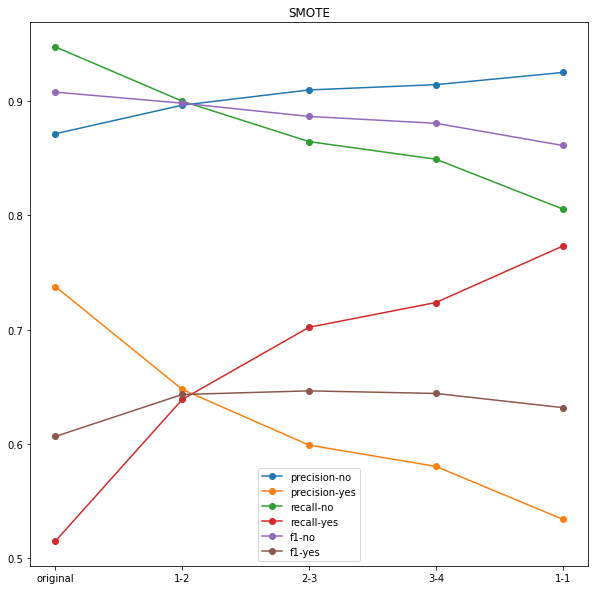

In [ ]:
precisons1_log_smote = []
precisons0_log_smote = []
recalls1_log_smote = []
recalls0_log_smote = []
f1s1_log_smote = []
f1s0_log_smote = []
precisons0_log_smote.append(original_log_score[0][0])
precisons1_log_smote.append(original_log_score[0][1])
recalls0_log_smote.append(original_log_score[1][0])
recalls1_log_smote.append(original_log_score[1][1])
f1s0_log_smote.append(original_log_score[2][0])
f1s1_log_smote.append(original_log_score[2][1])
for i in range(7,3, -1):
    X_train_resampled = np.load('datasets/{}'.format(datasets[2*i]))
    y_train_resampled = np.load('datasets/{}'.format(datasets[2*i+1]))
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)
    # model = resampled_models[i][1]
    # print(resampled_models[i][0])
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_log_smote.append(score[0][0])
    precisons1_log_smote.append(score[0][1])
    recalls0_log_smote.append(score[1][0])
    recalls1_log_smote.append(score[1][1])
    f1s0_log_smote.append(score[2][0])
    f1s1_log_smote.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter, precisons0_log_smote,'-o')
plt.plot(iter, precisons1_log_smote,'-o')
plt.plot(iter, recalls0_log_smote,'-o')
plt.plot(iter, recalls1_log_smote,'-o')
plt.plot(iter, f1s0_log_smote,'-o')
plt.plot(iter, f1s1_log_smote,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('SMOTE')

X_train_rus_12.npy
y_train_rus_12.npy
(array([0.89513698, 0.65072464]), array([0.90170843, 0.63418079]), array([0.89841069, 0.64234621]), array([22067,  6372]))
X_train_rus_23.npy
y_train_rus_23.npy
(array([0.90917732, 0.60300081]), array([0.86690533, 0.70009416]), array([0.88753828, 0.64793028]), array([22067,  6372]))
X_train_rus_34.npy
y_train_rus_34.npy
(array([0.91416581, 0.58054367]), array([0.84895999, 0.72394852]), array([0.88035714, 0.64436374]), array([22067,  6372]))
X_train_rus_11.npy
y_train_rus_11.npy
(array([0.92661176, 0.53039676]), array([0.80047129, 0.7804457 ]), array([0.85893508, 0.63157226]), array([22067,  6372]))


Text(0.5, 1.0, 'Random Undersample')

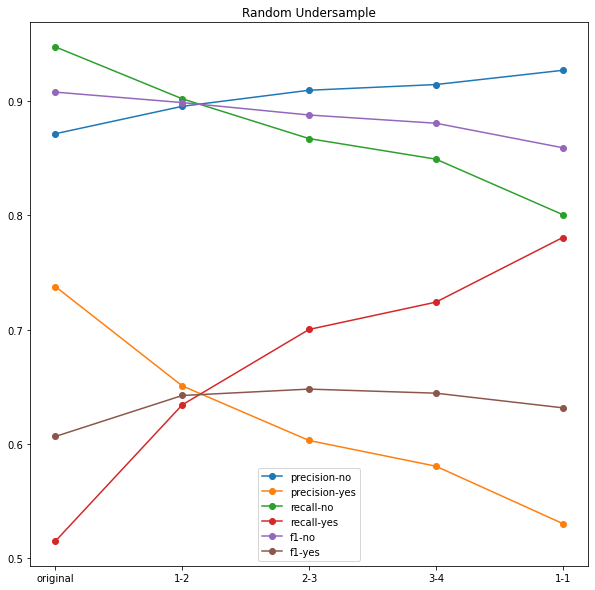

In [ ]:
precisons1_log_under = []
precisons0_log_under = []
recalls1_log_under = []
recalls0_log_under = []
f1s1_log_under = []
f1s0_log_under = []
precisons0_log_under.append(original_log_score[0][0])
precisons1_log_under.append(original_log_score[0][1])
recalls0_log_under.append(original_log_score[1][0])
recalls1_log_under.append(original_log_score[1][1])
f1s0_log_under.append(original_log_score[2][0])
f1s1_log_under.append(original_log_score[2][1])
for i in range(11,7, -1):
    X_train_resampled = np.load('datasets/{}'.format(datasets[2*i]))
    y_train_resampled = np.load('datasets/{}'.format(datasets[2*i+1]))
    print(datasets[2*i])
    print(datasets[2*i + 1])
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)
    # model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_log_under.append(score[0][0])
    precisons1_log_under.append(score[0][1])
    recalls0_log_under.append(score[1][0])
    recalls1_log_under.append(score[1][1])
    f1s0_log_under.append(score[2][0])
    f1s1_log_under.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_log_under,'-o')
plt.plot(iter, precisons1_log_under,'-o')
plt.plot(iter, recalls0_log_under,'-o')
plt.plot(iter, recalls1_log_under,'-o')
plt.plot(iter, f1s0_log_under,'-o')
plt.plot(iter, f1s1_log_under,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random Undersample')

##### Evaluate on subdata

In [ ]:
list_data = sorted(os.listdir('sub_data'))

In [ ]:
list_data

['X_test_origin.csv',
 'X_train.csv',
 'X_train_big.csv',
 'X_train_drop_miss.csv',
 'X_train_drop_relate.csv',
 'X_train_medium.csv',
 'X_train_small.csv',
 'y_test_origin.csv',
 'y_train.csv',
 'y_train_big.csv',
 'y_train_drop_miss.csv',
 'y_train_drop_relate.csv',
 'y_train_medium.csv',
 'y_train_small.csv']

In [ ]:

X_test_origin = pd.read_csv('sub_data/X_test_origin.csv')
y_test_origin = pd.read_csv('sub_data/y_test_origin.csv')
X_train_origin =  pd.read_csv('sub_data/X_train.csv')
y_train_origin =  pd.read_csv('sub_data/y_train.csv')
X_train_big =  pd.read_csv('sub_data/X_train_big.csv')
y_train_big =  pd.read_csv('sub_data/y_train_big.csv')
X_train_medium =  pd.read_csv('sub_data/X_train_medium.csv')
y_train_medium =  pd.read_csv('sub_data/y_train_medium.csv')
X_train_small =  pd.read_csv('sub_data/X_train_small.csv')
y_train_small =  pd.read_csv('sub_data/y_train_small.csv')
X_train_drop_miss = pd.read_csv('sub_data/X_train_drop_miss.csv')
y_train_drop_miss = pd.read_csv('sub_data/y_train_drop_miss.csv')
X_train_drop_relate = pd.read_csv('sub_data/X_train_drop_relate.csv')
y_train_drop_relate = pd.read_csv('sub_data/y_train_drop_relate.csv')

In [ ]:
X_train_drop_relate.shape 

(113754, 118)

In [ ]:
X_train_drop_miss.shape

(113754, 115)

In [ ]:
X_test_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
y_test_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
X_test_drop_miss = X_test_origin.drop(['Evaporation'], axis=1)
X_test_drop_miss.drop('Sunshine', axis = 1, inplace=True)
X_test_drop_miss.drop('Cloud9am', axis = 1,inplace=True)
X_test_drop_miss.drop('Cloud3pm', axis = 1,inplace=True)
X_test_drop_relate = X_test_origin.drop(['Humidity3pm'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y_test_origin = le.fit_transform(y_test_origin)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test_origin

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
train_test_pairs = [(X_train_origin, y_train_origin, X_test, y_test_origin), 
                    (X_train_medium, y_train_medium, X_test, y_test_origin),
                    (X_train_small, y_train_small, X_test, y_test_origin),
                    (X_train_drop_miss, y_train_drop_miss, X_test_drop_miss, y_test_origin),
                    (X_train_drop_relate, y_train_drop_relate, X_test_drop_relate, y_test_origin)] 

(113754, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.94775003, 0.51318267]), array([0.87083611, 0.73931721]), array([0.9076666 , 0.60583604]), array([24016,  4423]))
--------------------------------------------------
(79627, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.94716092, 0.49168236]), array([0.86582436, 0.72877413]), array([0.90466812, 0.58719895]), array([24140,  4299]))
--------------------------------------------------
(22751, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.93954774, 0.53405524]), array([0.87473631, 0.71838716]), array([0.9059844, 0.6126564]), array([23702,  4737]))
--------------------------------------------------
(113754, 114)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.95812752, 0.46516008]), array([0.86118692, 0.76234568]), array([0.90707452, 0.57777778]), array([24551,  3888]))
--------------------------------------------------
(113754, 117)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.95667739, 0.42906466]), array([0.85300416, 0.74092141]), array([0.90187116, 0.54343073]), array([24749,  3690]))
--------------------------------------------------


Text(0.5, 1.0, 'Subdatasets')

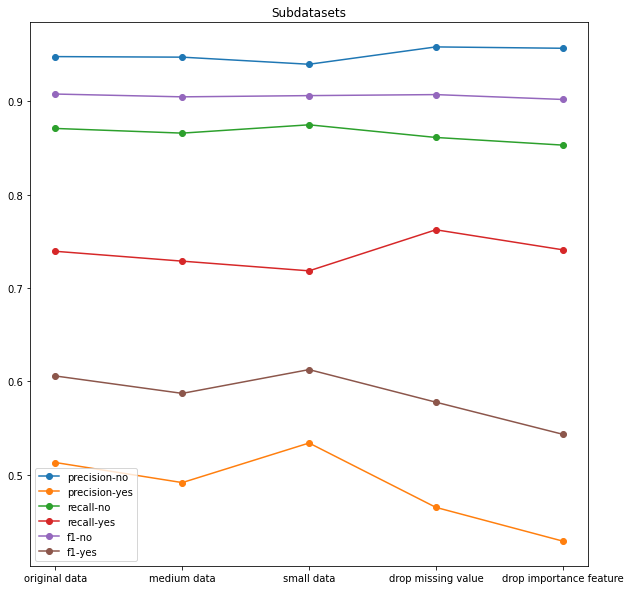

In [ ]:
subdata_models = []
subdata_scores = []
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
for i in range(5):
    X_train_sub = train_test_pairs[i][0]
    y_train_sub = train_test_pairs[i][1]
    X_test_sub = train_test_pairs[i][2]
    y_test_sub = train_test_pairs[i][3]
    print(X_train_sub.shape)
    y_train_sub = le.transform(y_train_sub)
    model = LogisticRegression(C=0.5, max_iter=10000, random_state=0)
    model.fit(X_train_sub,y_train_sub)
    subdata_models.append(model)
    y_pred = model.predict(X_test_sub)
    score = precision_recall_fscore_support(y_pred, y_test_sub)
    subdata_scores.append(score)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
    print('-'*50)


iter =['original data', 'medium data', 'small data', 'drop missing value', 'drop importance feature']
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'o-')
plt.plot(iter, precisons1, 'o-')
plt.plot(iter, recalls0, 'o-')
plt.plot(iter, recalls1, 'o-')
plt.plot(iter, f1s0, 'o-')
plt.plot(iter, f1s1, 'o-')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Subdatasets')

#### SVM

###### Evaluate on test set

Best poly params: **gamma** = 'scale', **C** = 1.0, **degree** = 2

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
import os 
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
best_poly_model = SVC(kernel='poly', gamma='scale', C=1.0, degree=2)

In [ ]:
y_pred = best_poly_model.predict(X_test_transformed)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.79      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439



In [ ]:
datasets = os.listdir('datasets')

In [ ]:
datasets 

['X_train_ros_11.npy',
 'y_train_ros_11.npy',
 'X_train_ros_34.npy',
 'y_train_ros_34.npy',
 'X_train_ros_23.npy',
 'y_train_ros_23.npy',
 'X_train_ros_12.npy',
 'y_train_ros_12.npy',
 'X_train_smote_11.npy',
 'y_train_smote_11.npy',
 'X_train_smote_34.npy',
 'y_train_smote_34.npy',
 'X_train_smote_23.npy',
 'y_train_smote_23.npy',
 'X_train_smote_12.npy',
 'y_train_smote_12.npy',
 'X_train_rus_11.npy',
 'y_train_rus_11.npy',
 'X_train_rus_34.npy',
 'y_train_rus_34.npy',
 'X_train_rus_23.npy',
 'y_train_rus_23.npy',
 'X_train_rus_12.npy',
 'y_train_rus_12.npy',
 'X_train_tomek.npy',
 'y_train_tomek.npy',
 'X_train_enn_all.npy',
 'y_train_enn_all.npy',
 'X_train_origin.csv']

In [ ]:
resampled_models = []

for i in tqdm(range(8, 28, 2)):
    best_svm = SVC(kernel='poly', degree=2)
    print()
    print('Loading data from {}'.format(datasets[i]))
    X_train_resampled = np.load(os.path.join('datasets', datasets[i]))
    print('Loading labels from {}'.format(datasets[i + 1]))
    y_train_resampled = np.load(os.path.join('datasets', datasets[i+1]))
    _ = best_svm.fit(X_train_resampled, y_train_resampled)
    y_pred = best_svm.predict(X_test_transformed)
    target_names = ['No', 'Yes']
    print(classification_report(y_test, y_pred, target_names=target_names))
    filename = 'resampled_model_{}.pkl'.format(datasets[i])
    print('Saving model fit on {} to resampled_models'.format(datasets[i]))
    with open(os.path.join('resampled_models', filename), 'wb') as f:
        pickle.dump(best_svm, f)
    resampled_models.append(best_svm)
    
    

  0%|          | 0/10 [00:00<?, ?it/s]


Loading data from X_train_smote_11.npy
Loading labels from y_train_smote_11.npy
              precision    recall  f1-score   support

          No       0.92      0.85      0.88     22067
         Yes       0.59      0.76      0.67      6372

    accuracy                           0.83     28439
   macro avg       0.76      0.80      0.77     28439
weighted avg       0.85      0.83      0.84     28439

Saving model fit on X_train_smote_11.npy to resampled_models


 10%|█         | 1/10 [1:13:47<11:04:05, 4427.26s/it]


Loading data from X_train_smote_34.npy
Loading labels from y_train_smote_34.npy


 20%|██        | 2/10 [2:11:08<9:10:51, 4131.50s/it] 

              precision    recall  f1-score   support

          No       0.92      0.88      0.90     22067
         Yes       0.63      0.72      0.67      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.80      0.78     28439
weighted avg       0.85      0.84      0.85     28439

Saving model fit on X_train_smote_34.npy to resampled_models

Loading data from X_train_smote_23.npy
Loading labels from y_train_smote_23.npy


 30%|███       | 3/10 [3:03:17<7:26:54, 3830.71s/it]

              precision    recall  f1-score   support

          No       0.91      0.89      0.90     22067
         Yes       0.64      0.70      0.67      6372

    accuracy                           0.85     28439
   macro avg       0.78      0.79      0.79     28439
weighted avg       0.85      0.85      0.85     28439

Saving model fit on X_train_smote_23.npy to resampled_models

Loading data from X_train_smote_12.npy
Loading labels from y_train_smote_12.npy


 40%|████      | 4/10 [3:44:46<5:42:48, 3428.07s/it]

              precision    recall  f1-score   support

          No       0.90      0.92      0.91     22067
         Yes       0.69      0.65      0.67      6372

    accuracy                           0.86     28439
   macro avg       0.80      0.78      0.79     28439
weighted avg       0.85      0.86      0.86     28439

Saving model fit on X_train_smote_12.npy to resampled_models

Loading data from X_train_rus_11.npy
Loading labels from y_train_rus_11.npy


 50%|█████     | 5/10 [3:51:59<3:30:48, 2529.79s/it]

              precision    recall  f1-score   support

          No       0.93      0.82      0.87     22067
         Yes       0.56      0.80      0.66      6372

    accuracy                           0.81     28439
   macro avg       0.75      0.81      0.77     28439
weighted avg       0.85      0.81      0.82     28439

Saving model fit on X_train_rus_11.npy to resampled_models

Loading data from X_train_rus_34.npy
Loading labels from y_train_rus_34.npy


 60%|██████    | 6/10 [4:01:51<2:09:53, 1948.46s/it]

              precision    recall  f1-score   support

          No       0.92      0.86      0.89     22067
         Yes       0.61      0.74      0.67      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.80      0.78     28439
weighted avg       0.85      0.84      0.84     28439

Saving model fit on X_train_rus_34.npy to resampled_models

Loading data from X_train_rus_23.npy
Loading labels from y_train_rus_23.npy


 70%|███████   | 7/10 [4:12:46<1:18:00, 1560.18s/it]

              precision    recall  f1-score   support

          No       0.92      0.88      0.90     22067
         Yes       0.63      0.72      0.67      6372

    accuracy                           0.84     28439
   macro avg       0.77      0.80      0.78     28439
weighted avg       0.85      0.84      0.85     28439

Saving model fit on X_train_rus_23.npy to resampled_models

Loading data from X_train_rus_12.npy
Loading labels from y_train_rus_12.npy


 80%|████████  | 8/10 [4:27:33<45:16, 1358.23s/it]  

              precision    recall  f1-score   support

          No       0.90      0.92      0.91     22067
         Yes       0.69      0.65      0.67      6372

    accuracy                           0.86     28439
   macro avg       0.80      0.78      0.79     28439
weighted avg       0.85      0.86      0.85     28439

Saving model fit on X_train_rus_12.npy to resampled_models

Loading data from X_train_tomek.npy
Loading labels from y_train_tomek.npy


 90%|█████████ | 9/10 [4:52:28<23:19, 1399.46s/it]

              precision    recall  f1-score   support

          No       0.88      0.95      0.91     22067
         Yes       0.75      0.56      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.78     28439
weighted avg       0.85      0.86      0.85     28439

Saving model fit on X_train_tomek.npy to resampled_models

Loading data from X_train_enn_all.npy
Loading labels from y_train_enn_all.npy


100%|██████████| 10/10 [5:04:31<00:00, 1827.15s/it]

              precision    recall  f1-score   support

          No       0.92      0.86      0.89     22067
         Yes       0.60      0.73      0.66      6372

    accuracy                           0.83     28439
   macro avg       0.76      0.80      0.78     28439
weighted avg       0.85      0.83      0.84     28439

Saving model fit on X_train_enn_all.npy to resampled_models


In [ ]:
RESAMPLED_DIR = 'resampled_models'

In [ ]:
resampled_models = []
for file in os.listdir(RESAMPLED_DIR):
    with open(os.path.join(RESAMPLED_DIR, file), 'rb') as f:
        resampled_models.append((file, pickle.load(f)))

In [ ]:
sorted(datasets)

['X_train_enn_all.npy',
 'X_train_origin.csv',
 'X_train_ros_11.npy',
 'X_train_ros_12.npy',
 'X_train_ros_23.npy',
 'X_train_ros_34.npy',
 'X_train_rus_11.npy',
 'X_train_rus_12.npy',
 'X_train_rus_23.npy',
 'X_train_rus_34.npy',
 'X_train_smote_11.npy',
 'X_train_smote_12.npy',
 'X_train_smote_23.npy',
 'X_train_smote_34.npy',
 'X_train_tomek.npy',
 'y_train_enn_all.npy',
 'y_train_ros_11.npy',
 'y_train_ros_12.npy',
 'y_train_ros_23.npy',
 'y_train_ros_34.npy',
 'y_train_rus_11.npy',
 'y_train_rus_12.npy',
 'y_train_rus_23.npy',
 'y_train_rus_34.npy',
 'y_train_smote_11.npy',
 'y_train_smote_12.npy',
 'y_train_smote_23.npy',
 'y_train_smote_34.npy',
 'y_train_tomek.npy']

In [ ]:
original_model = SVC(degree=2)
_ = original_model.fit(X_train_transformed, y_train)

In [ ]:
iter = ['original', '1-2', '2-3', '3-4', '1-1']

In [ ]:
resampled_models = sorted(resampled_models, key = lambda x: x[0])

In [ ]:
resampled_models

[('resampled_model_X_train_enn_all.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_11.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_12.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_23.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_siz

In [ ]:
precisons1_ros = []
precisons0_ros = []
recalls1_ros = []
recalls0_ros = []
f1s1_ros = []
f1s0_ros = []

original_score = precision_recall_fscore_support(y_test, y_pred_svm)
precisons1_ros.append(original_score[0][1])
precisons0_ros.append(original_score[0][0])
recalls1_ros.append(original_score[1][1])
recalls0_ros.append(original_score[1][0])
f1s1_ros.append(original_score[2][1])
f1s0_ros.append(original_score[2][0])
for i in range(2,5):
    # X_train = np.load('datasets/{}'.format(list_data[2*i]))
    # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
    # model.fit(X_train,y_train)
    model = resampled_models[i][1]
    print(resampled_models[i][0])
    y_pred = model.predict(X_test_transformed)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0_ros.append(score[0][0])
    precisons1_ros.append(score[0][1])
    recalls0_ros.append(score[1][0])
    recalls1_ros.append(score[1][1])
    f1s0_ros.append(score[2][0])
    f1s1_ros.append(score[2][1])
    print(score)

model = resampled_models[1][1]
print(resampled_models[1][0])
y_pred11 = model.predict(X_test_transformed)
score = precision_recall_fscore_support(y_test, y_pred11)
precisons0_ros.append(score[0][0])
precisons1_ros.append(score[0][1])
recalls0_ros.append(score[1][0])
recalls1_ros.append(score[1][1])
f1s0_ros.append(score[2][0])
f1s1_ros.append(score[2][1])


resampled_model_X_train_ros_12.npy.pkl
(array([0.90044987, 0.69088176]), array([0.91611909, 0.6492467 ]), array([0.9082169 , 0.66941748]), array([22067,  6372]))
resampled_model_X_train_ros_23.npy.pkl
(array([0.91696462, 0.64137547]), array([0.8832646 , 0.72300691]), array([0.89979918, 0.67974917]), array([22067,  6372]))
resampled_model_X_train_ros_34.npy.pkl
(array([0.92156014, 0.62006278]), array([0.86835546, 0.74403641]), array([0.89416706, 0.67641604]), array([22067,  6372]))
resampled_model_X_train_ros_11.npy.pkl


Text(0.5, 1.0, 'Random OverSamples')

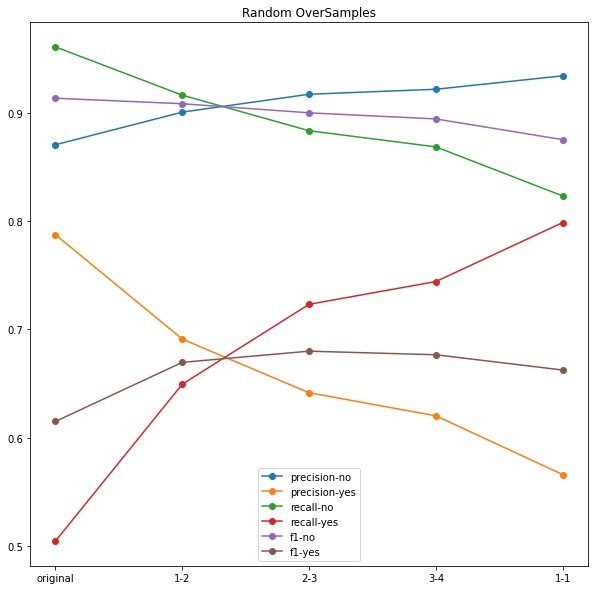

In [ ]:

plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_ros,'-o')
plt.plot(iter, precisons1_ros,'-o')
plt.plot(iter, recalls0_ros,'-o')
plt.plot(iter, recalls1_ros,'-o')
plt.plot(iter, f1s0_ros,'-o')
plt.plot(iter, f1s1_ros,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random OverSamples')

In [ ]:
smote_results = {'precisions1': precisons1_smote, 'precisions0': precisons0_smote, 'recalls1':recalls1_smote, 'recalls0': recalls0_smote, 'f1s1': f1s1_smote, 'f1s0': f1s0_smote}
with open('resampled_results/svm/smote_results.pkl', 'wb') as f:
    pickle.dump(smote_results, f)

NameError: ignored

In [ ]:
rus_results = {'precisions1': precisons1_under, 'precisions0': precisons0_under, 'recalls1':recalls1_under, 'recalls0': recalls0_under, 'f1s1': f1s1_under, 'f1s0': f1s0_under}
with open('resampled_results/svm/rus_results.pkl', 'wb') as f:
    pickle.dump(rus_results, f)

In [ ]:
# with open('resampled_results/svm/ros_results.pkl', 'rb') as f:
#     ros_results = pickle.load(f)
with open('resampled_results/svm/smote_results.pkl', 'rb') as f:
    smote_results = pickle.load(f)
with open('resampled_results/svm/rus_results.pkl', 'rb') as f:
    rus_results = pickle.load(f)

In [ ]:
resampled_models

[('resampled_model_X_train_enn_all.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_11.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_12.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('resampled_model_X_train_ros_23.npy.pkl',
  SVC(C=1.0, break_ties=False, cache_siz

resampled_model_X_train_smote_11.npy.pkl
(array([0.84750986, 0.76177024]), array([0.92492582, 0.5905828 ]), array([0.88452716, 0.66534165]), array([20220,  8219]))
resampled_model_X_train_smote_34.npy.pkl
(array([0.87624054, 0.72222222]), array([0.91613759, 0.62757398]), array([0.89574503, 0.67157972]), array([21106,  7333]))
resampled_model_X_train_smote_23.npy.pkl
(array([0.88838537, 0.70150659]), array([0.91155956, 0.64474254]), array([0.89982329, 0.67192785]), array([21506,  6933]))
resampled_model_X_train_smote_12.npy.pkl
(array([0.91716137, 0.65112994]), array([0.90103286, 0.69416095]), array([0.90902558, 0.67195724]), array([22462,  5977]))


Text(0.5, 1.0, 'Smote')

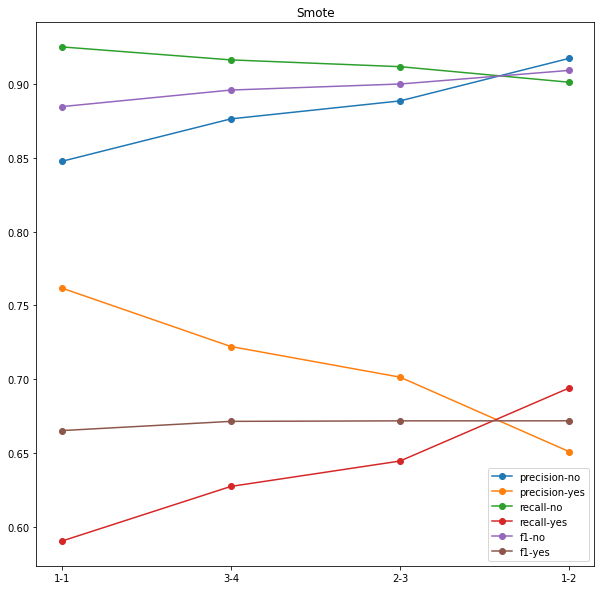

In [ ]:
# precisons1_smote = []
# precisons0_smote = []
# recalls1_smote = []
# recalls0_smote = []
# f1s1_smote = []
# f1s0_smote = []
# original_score = precision_recall_fscore_support(y_pred_svm, y_test)
# precisons1_ros.append(original_score[0][1])
# precisons0_ros.append(original_score[0][0])
# recalls1_ros.append(original_score[1][1])
# recalls0_ros.append(original_score[1][0])
# f1s1_ros.append(original_score[2][1])
# f1s0_ros.append(original_score[2][0])
# for i in range(4,8):
#     # X_train = np.load('datasets/{}'.format(list_data[2*i]))
#     # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
#     # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
#     # model.fit(X_train,y_train)
#     print(resampled_models[i][0])
#     model = resampled_models[i][1]
#     y_pred = model.predict(X_test_transformed)
#     score = precision_recall_fscore_support(y_pred, y_test)
#     precisons0_smote.append(score[0][0])
#     precisons1_smote.append(score[0][1])
#     recalls0_smote.append(score[1][0])
#     recalls1_smote.append(score[1][1])
#     f1s0_smote.append(score[2][0])
#     f1s1_smote.append(score[2][1])
#     print(score)
# plt.figure(figsize=(10,10))
# plt.plot(iter,precisons0_smote,'-o')
# plt.plot(iter, precisons1_smote,'-o')
# plt.plot(iter, recalls0_smote,'-o')
# plt.plot(iter, recalls1_smote,'-o')
# plt.plot(iter, f1s0_smote,'-o')
# plt.plot(iter, f1s1_smote,'-o')
# plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
# plt.title('Smote')

In [ ]:
smote_results

{'f1s0': [0.8845271596471729,
  0.8957450258263266,
  0.8998232850618502,
  0.9090255788362639],
 'f1s1': [0.6653416489616888,
  0.6715797154323239,
  0.6719278466741827,
  0.6719572435014981],
 'precisions0': [0.8475098563465808,
  0.8762405401731092,
  0.8883853718221779,
  0.9171613721847102],
 'precisions1': [0.7617702448210922,
  0.7222222222222222,
  0.7015065913370998,
  0.6511299435028248],
 'recalls0': [0.9249258160237389,
  0.916137591206292,
  0.9115595647726216,
  0.9010328554892708],
 'recalls1': [0.5905827959605792,
  0.6275739806354834,
  0.6447425356988317,
  0.6941609503095199]}

In [ ]:

precisons1_smote = [original_score[0][1]] + smote_results['recalls1'][::-1]
precisons0_smote = [original_score[0][0]] + smote_results['recalls0'][::-1]
recalls1_smote = [original_score[1][1]] + smote_results['precisions1'][::-1]
recalls0_smote = [original_score[1][0]] + smote_results['precisions0'][::-1]
f1s1_smote = [original_score[2][1]] + smote_results['f1s1'][::-1]
f1s0_smote = [original_score[2][0]] + smote_results['f1s0'][::-1]

Text(0.5, 1.0, 'Smote')

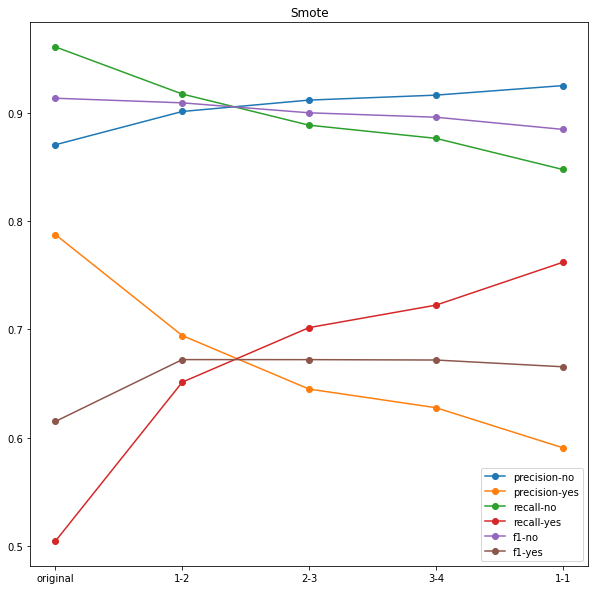

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_smote,'-o')
plt.plot(iter, precisons1_smote,'-o')
plt.plot(iter, recalls0_smote,'-o')
plt.plot(iter, recalls1_smote,'-o')
plt.plot(iter, f1s0_smote,'-o')
plt.plot(iter, f1s1_smote,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Smote')

resampled_model_X_train_smote_11.npy.pkl
(array([0.84750986, 0.76177024]), array([0.92492582, 0.5905828 ]), array([0.88452716, 0.66534165]), array([20220,  8219]))
resampled_model_X_train_smote_34.npy.pkl
(array([0.87624054, 0.72222222]), array([0.91613759, 0.62757398]), array([0.89574503, 0.67157972]), array([21106,  7333]))
resampled_model_X_train_smote_23.npy.pkl
(array([0.88838537, 0.70150659]), array([0.91155956, 0.64474254]), array([0.89982329, 0.67192785]), array([21506,  6933]))
resampled_model_X_train_smote_12.npy.pkl
(array([0.91716137, 0.65112994]), array([0.90103286, 0.69416095]), array([0.90902558, 0.67195724]), array([22462,  5977]))


Text(0.5, 1.0, 'Smote')

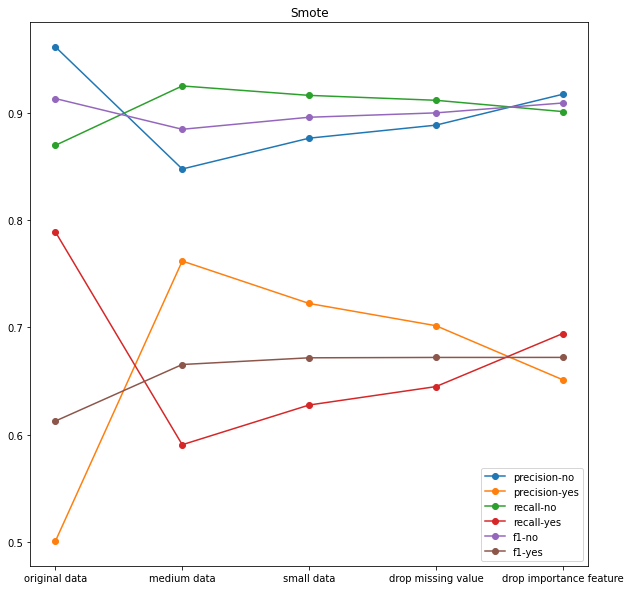

In [ ]:
# precisons1_smote = []
# precisons0_smote = []
# recalls1_smote = []
# recalls0_smote = []
# f1s1_smote = []
# f1s0_smote = []
# precisons0_smote.append(0.96129968)
# precisons1_smote.append(0.50078468)
# recalls0_smote.append(0.86959908)
# recalls1_smote.append(0.78887515)
# f1s0_smote.append(0.91315297)
# f1s1_smote.append(0.6126524)
# for i in range(4,8):
#     # X_train = np.load('datasets/{}'.format(list_data[2*i]))
#     # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
#     # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
#     # model.fit(X_train,y_train)
#     print(resampled_models[i][0])
#     model = resampled_models[i][1]
#     y_pred = model.predict(X_test_transformed)
#     score = precision_recall_fscore_support(y_pred, y_test)
#     precisons0_smote.append(score[0][0])
#     precisons1_smote.append(score[0][1])
#     recalls0_smote.append(score[1][0])
#     recalls1_smote.append(score[1][1])
#     f1s0_smote.append(score[2][0])
#     f1s1_smote.append(score[2][1])
#     print(score)
# plt.figure(figsize=(10,10))
# plt.plot(iter,precisons0_smote,'-o')
# plt.plot(iter, precisons1_smote,'-o')
# plt.plot(iter, recalls0_smote,'-o')
# plt.plot(iter, recalls1_smote,'-o')
# plt.plot(iter, f1s0_smote,'-o')
# plt.plot(iter, f1s1_smote,'-o')
# plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
# plt.title('Smote')

resampled_model_X_train_rus_11.npy.pkl
(array([0.81823537, 0.79896422]), array([0.93375394, 0.55932762]), array([0.87218626, 0.65800698]), array([19337,  9102]))
resampled_model_X_train_rus_34.npy.pkl
(array([0.86495672, 0.74340866]), array([0.92109835, 0.61383957]), array([0.89214518, 0.67243949]), array([20722,  7717]))
resampled_model_X_train_rus_23.npy.pkl
(array([0.87959396, 0.71814187]), array([0.91530699, 0.63265588]), array([0.89709519, 0.67269386]), array([21206,  7233]))
resampled_model_X_train_rus_12.npy.pkl
(array([0.91670821, 0.64736347]), array([0.9000267 , 0.69176589]), array([0.90829087, 0.66882854]), array([22476,  5963]))


Text(0.5, 1.0, 'Random Undersample')

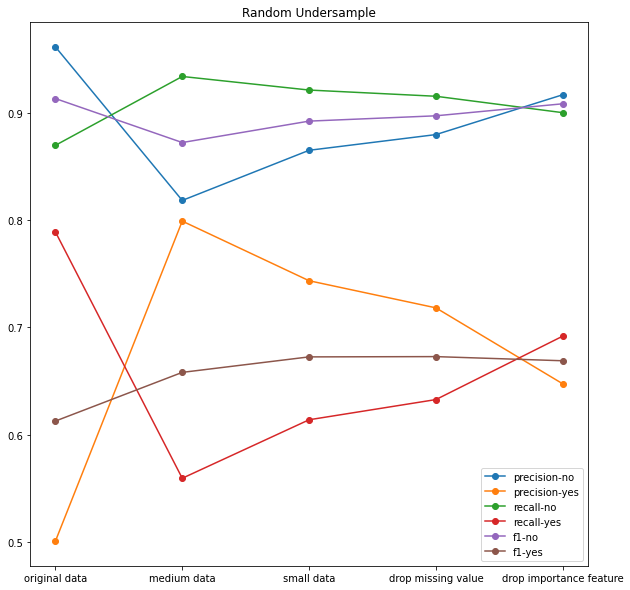

In [ ]:
# precisons1_under = []
# precisons0_under = []
# recalls1_under = []
# recalls0_under = []
# f1s1_under = []
# f1s0_under = []
# precisons0_under.append(0.96129968)
# precisons1_under.append(0.50078468)
# recalls0_under.append(0.86959908)
# recalls1_under.append(0.78887515)
# f1s0_under.append(0.91315297)
# f1s1_under.append(0.6126524)
# for i in range(8,12):
#     # X_train = np.load('datasets/{}'.format(list_data[2*i]))
#     # y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
#     # model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf=9)
#     # model.fit(X_train,y_train)
#     print(resampled_models[i][0])
#     model = resampled_models[i][1]
#     y_pred = model.predict(X_test_transformed)
#     score = precision_recall_fscore_support(y_pred, y_test)
#     precisons0_under.append(score[0][0])
#     precisons1_under.append(score[0][1])
#     recalls0_under.append(score[1][0])
#     recalls1_under.append(score[1][1])
#     f1s0_under.append(score[2][0])
#     f1s1_under.append(score[2][1])
#     print(score)
# plt.figure(figsize=(10,10))
# plt.plot(iter,precisons0_under,'-o')
# plt.plot(iter, precisons1_under,'-o')
# plt.plot(iter, recalls0_under,'-o')
# plt.plot(iter, recalls1_under,'-o')
# plt.plot(iter, f1s0_under,'-o')
# plt.plot(iter, f1s1_under,'-o')
# plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
# plt.title('Random Undersample')

In [ ]:
precisons1_under = [original_score[0][1]] + rus_results['recalls1'][::-1]
precisons0_under = [original_score[0][0]] + rus_results['recalls0'][::-1]
recalls1_under = [original_score[1][1]] + rus_results['precisions1'][::-1]
recalls0_under = [original_score[1][0]] + rus_results['precisions0'][::-1]
f1s1_under = [original_score[2][1]] + rus_results['f1s1'][::-1]
f1s0_under = [original_score[2][0]] + rus_results['f1s0'][::-1]

Text(0.5, 1.0, 'Random Undersample')

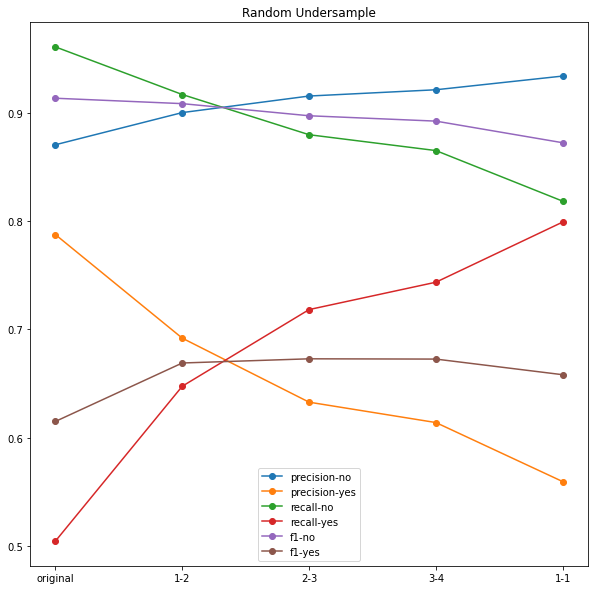

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0_under,'-o')
plt.plot(iter, precisons1_under,'-o')
plt.plot(iter, recalls0_under,'-o')
plt.plot(iter, recalls1_under,'-o')
plt.plot(iter, f1s0_under,'-o')
plt.plot(iter, f1s1_under,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random Undersample')

###### Evaluate on subdata

In [ ]:
list_data = sorted(os.listdir('sub_data'))

In [ ]:
list_data

['X_test_origin.csv',
 'X_train.csv',
 'X_train_big.csv',
 'X_train_drop_miss.csv',
 'X_train_drop_relate.csv',
 'X_train_medium.csv',
 'X_train_small.csv',
 'y_test_origin.csv',
 'y_train.csv',
 'y_train_big.csv',
 'y_train_drop_miss.csv',
 'y_train_drop_relate.csv',
 'y_train_medium.csv',
 'y_train_small.csv']

In [ ]:

X_test = pd.read_csv('sub_data/X_test_origin.csv')
y_test = pd.read_csv('sub_data/y_test_origin.csv')
X_train_origin =  pd.read_csv('sub_data/X_train.csv')
y_train_origin =  pd.read_csv('sub_data/y_train.csv')
X_train_big =  pd.read_csv('sub_data/X_train_big.csv')
y_train_big =  pd.read_csv('sub_data/y_train_big.csv')
X_train_medium =  pd.read_csv('sub_data/X_train_medium.csv')
y_train_medium =  pd.read_csv('sub_data/y_train_medium.csv')
X_train_small =  pd.read_csv('sub_data/X_train_small.csv')
y_train_small =  pd.read_csv('sub_data/y_train_small.csv')
X_train_drop_miss = pd.read_csv('sub_data/X_train_drop_miss.csv')
y_train_drop_miss = pd.read_csv('sub_data/y_train_drop_miss.csv')
X_train_drop_relate = pd.read_csv('sub_data/X_train_drop_relate.csv')
y_train_drop_relate = pd.read_csv('sub_data/y_train_drop_relate.csv')

In [ ]:
X_train_drop_relate.shape 

(113754, 118)

In [ ]:
X_train_drop_miss.shape

(113754, 115)

In [ ]:
X_train_medium.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E.1,ENE.1,ESE.1,N.1,NE.1,NNE.1,NNW.1,NW.1,S.1,SE.1,SSE.1,SSW.1,SW.1,W.1,WNW.1,WSW.1,E.2,ENE.2,ESE.2,N.2,NE.2,NNE.2,NNW.2,NW.2,S.2,SE.2,SSE.2,SSW.2,SW.2,W.2,WNW.2,WSW.2
0,0,0.490566,0.550095,0.003264,0.027586,0.586207,0.255814,0.053846,0.195402,0.71,0.33,0.543802,0.531353,0.555556,0.625,0.474684,0.563953,0.1,1.000000,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.396226,0.389414,0.000000,0.034483,0.103448,0.410853,0.184615,0.356322,0.87,0.46,0.583471,0.595710,0.111111,0.375,0.373418,0.403101,0.6,0.545455,0.600000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.471698,0.480151,0.000000,0.042759,0.317241,0.325581,0.100000,0.195402,0.60,0.49,0.603306,0.610561,0.666667,0.875,0.485232,0.474806,0.8,0.000000,0.866667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.558962,0.483932,0.003264,0.034483,0.724138,0.627907,0.300000,0.321839,0.23,0.19,0.442975,0.450495,0.111111,0.125,0.493671,0.501938,0.2,0.636364,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.377358,0.379962,0.000000,0.033103,0.586207,0.472868,0.284615,0.402299,0.53,0.46,0.395041,0.429043,0.555556,0.625,0.407173,0.375969,0.2,0.545455,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.drop(['Unnamed: 0'], inplace=True, axis=1)
y_test.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_origin.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_medium.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_small.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_miss.drop(['Unnamed: 0'], inplace=True, axis=1)
X_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)
y_train_drop_relate.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
X_test_drop_miss = X_test.drop(['Evaporation'], axis=1)
X_test_drop_miss.drop('Sunshine', axis = 1, inplace=True)
X_test_drop_miss.drop('Cloud9am', axis = 1,inplace=True)
X_test_drop_miss.drop('Cloud3pm', axis = 1,inplace=True)
X_test_drop_relate = X_test.drop(['Humidity3pm'], axis=1)

In [ ]:
train_test_pairs = [(X_train_origin, y_train_origin, X_test, y_test), 
                    (X_train_medium, y_train_medium, X_test, y_test),
                    (X_train_small, y_train_small, X_test, y_test),
                    (X_train_drop_miss, y_train_drop_miss, X_test_drop_miss, y_test),
                    (X_train_drop_relate, y_train_drop_relate, X_test_drop_relate, y_test)] 

(113754, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96129968, 0.50078468]), array([0.86959908, 0.78887515]), array([0.91315297, 0.6126524 ]), array([24394,  4045]))
--------------------------------------------------
(79627, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96510627, 0.47394852]), array([0.86401071, 0.79683377]), array([0.91176471, 0.59437119]), array([24649,  3790]))
--------------------------------------------------
(22751, 118)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.95839942, 0.49231011]), array([0.86733104, 0.77361282]), array([0.91059396, 0.60170711]), array([24384,  4055]))
--------------------------------------------------
(113754, 114)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96891286, 0.48634652]), array([0.86724264, 0.81875826]), array([0.91526294, 0.61021955]), array([24654,  3785]))
--------------------------------------------------
(113754, 117)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.96746273, 0.46406152]), array([0.86209821, 0.80462585]), array([0.91174649, 0.58863342]), array([24764,  3675]))
--------------------------------------------------


Text(0.5, 1.0, 'Subdatasets')

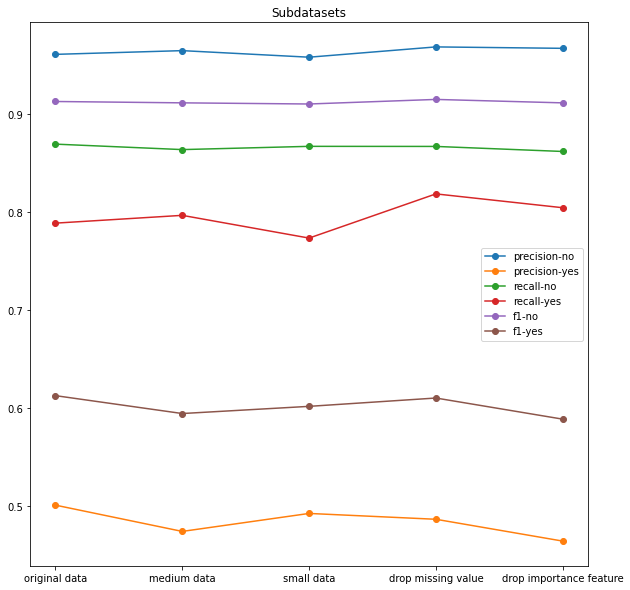

In [ ]:
subdata_models = []
subdata_scores = []
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
for i in range(5):
    X_train_sub = train_test_pairs[i][0]
    y_train_sub = train_test_pairs[i][1]
    X_test_sub = train_test_pairs[i][2]
    y_test_sub = train_test_pairs[i][3]
    print(X_train_sub.shape)
    model = SVC(kernel='poly', degree=2)
    model.fit(X_train_sub,y_train_sub)
    subdata_models.append(model)
    y_pred = model.predict(X_test_sub)
    score = precision_recall_fscore_support(y_pred, y_test_sub)
    subdata_scores.append(score)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
    print('-'*50)


iter =['original data', 'medium data', 'small data', 'drop missing value', 'drop importance feature']
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'o-')
plt.plot(iter, precisons1, 'o-')
plt.plot(iter, recalls0, 'o-')
plt.plot(iter, recalls1, 'o-')
plt.plot(iter, f1s0, 'o-')
plt.plot(iter, f1s1, 'o-')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Subdatasets')

#### Decision Tree

##### Evaluate on resampled data

(array([0.87204278, 0.66765403]), array([0.92373227, 0.53060264]), array([0.89714361, 0.59129066]), array([22067,  6372]))
(array([0.88501868, 0.61386298]), array([0.891195  , 0.59902699]), array([0.8880961 , 0.60635425]), array([22067,  6372]))
(array([0.90282503, 0.53960275]), array([0.82983641, 0.69067797]), array([0.86479339, 0.60586454]), array([22067,  6372]))
(array([0.90552215, 0.52070322]), array([0.81220827, 0.70652856]), array([0.85633063, 0.59954721]), array([22067,  6372]))


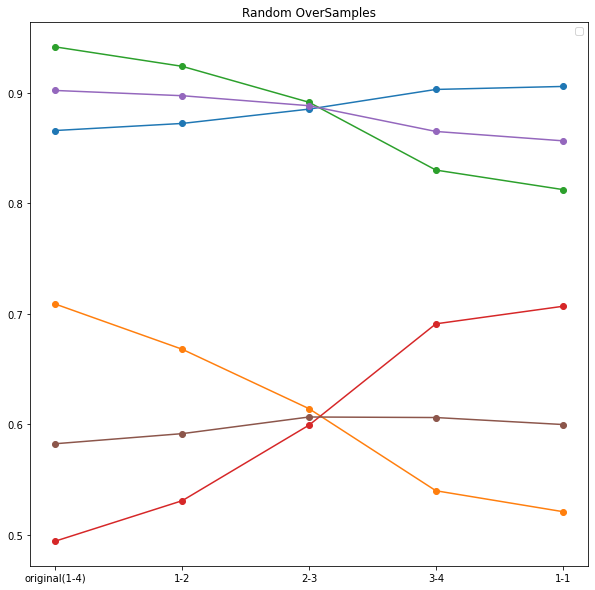

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_origin,y_train_origin)
y_pred = model.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])
plt.figure(figsize=(10,10))
for i in range(3,-1, -1):
    X_train = np.load('datasets/{}'.format(list_data[2*i]))
    y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
    model.fit(X_train_transformed ,y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Random OverSamples')
plt.plot(iter,precisons0,'-o')
plt.plot(iter, precisons1,'-o')
plt.plot(iter, recalls0,'-o')
plt.plot(iter, recalls1,'-o')
plt.plot(iter, f1s0,'-o')
plt.plot(iter, f1s1,'-o')

(array([0.88790069, 0.57685009]), array([0.86862736, 0.62021343]), array([0.87815829, 0.59774635]), array([22067,  6372]))
(array([0.89614213, 0.48049802]), array([0.78633253, 0.6844005 ]), array([0.83765387, 0.56460383]), array([22067,  6372]))
(array([0.90989195, 0.49653259]), array([0.78615127, 0.73038293]), array([0.84350765, 0.5911718 ]), array([22067,  6372]))
(array([0.90612352, 0.4871468 ]), array([0.78121176, 0.71971124]), array([0.8390441 , 0.58102116]), array([22067,  6372]))


Text(0.5, 1.0, 'Smote')

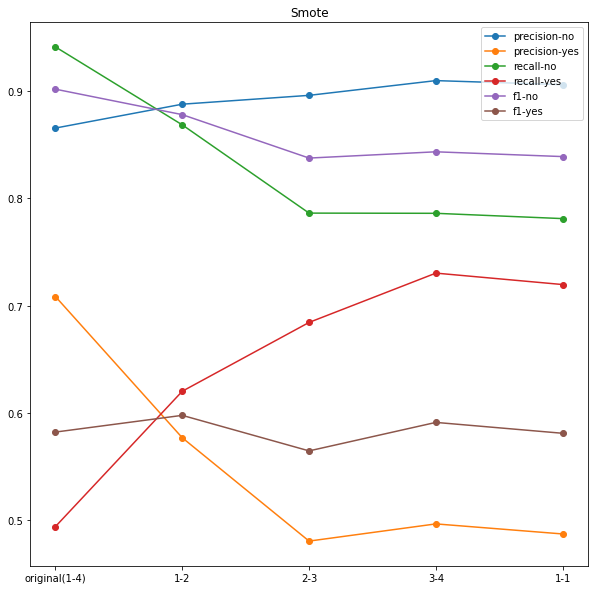

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_origin,y_train_origin)
y_pred = model.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])
for i in range(7,3,-1):
    X_train = np.load('datasets/{}'.format(list_data[2*i]))
    y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'-o')
plt.plot(iter, precisons1,'-o')
plt.plot(iter, recalls0,'-o')
plt.plot(iter, recalls1,'-o')
plt.plot(iter, f1s0,'-o')
plt.plot(iter, f1s1,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Smote')

(array([0.8723844 , 0.65375024]), array([0.91820365, 0.53483992]), array([0.89470779, 0.588347  ]), array([22067,  6372]))
(array([0.87959583, 0.61392935]), array([0.89550007, 0.5754865 ]), array([0.8874767 , 0.59408667]), array([22067,  6372]))
(array([0.88360597, 0.61128172]), array([0.89101373, 0.59353421]), array([0.88729439, 0.60227725]), array([22067,  6372]))
(array([0.90788934, 0.51283776]), array([0.80309965, 0.717828  ]), array([0.85228557, 0.59826041]), array([22067,  6372]))


Text(0.5, 1.0, 'UnderSamples')

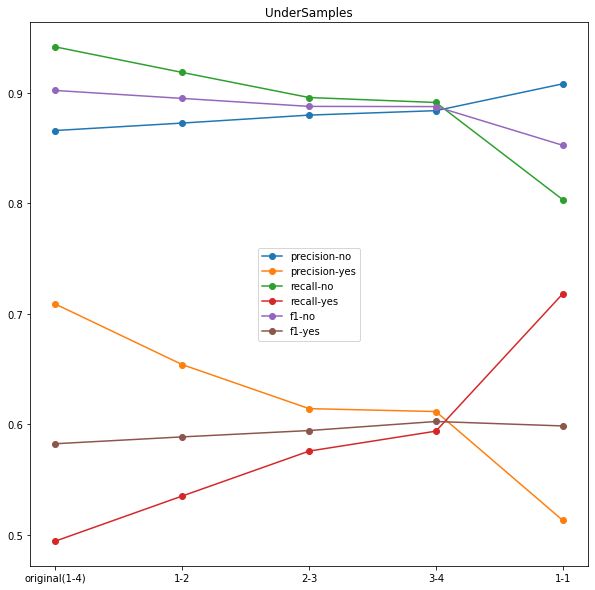

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_origin,y_train_origin)
y_pred = model.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])
for i in range(11,7,-1):
    X_train = np.load('datasets/{}'.format(list_data[2*i]))
    y_train = np.load('datasets/{}'.format(list_data[2*i+1]))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_test, y_pred)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'-o')
plt.plot(iter, precisons1,'-o')
plt.plot(iter, recalls0,'-o')
plt.plot(iter, recalls1,'-o')
plt.plot(iter, f1s0,'-o')
plt.plot(iter, f1s1,'-o')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('UnderSamples')

##### Evaluate on subdata

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
clf.fit(X_train_origin,y_train_origin)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
precisons1 = []
precisons0 = []
recalls1 = []
recalls0 = []
f1s1 = []
f1s0 = []
for i in range(4,7):
    X_train = pd.read_csv('datasets/{}'.format(list_data[2*i]))
    y_train = pd.read_csv('datasets/{}'.format(list_data[2*i+1]))
    X_train.drop(['Unnamed: 0'], inplace=True, axis=1)
    y_train.drop(['Unnamed: 0'], inplace=True, axis=1)
    print(len(X_train))
    model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9, )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = precision_recall_fscore_support(y_pred, y_test)
    precisons0.append(score[0][0])
    precisons1.append(score[0][1])
    recalls0.append(score[1][0])
    recalls1.append(score[1][1])
    f1s0.append(score[2][0])
    f1s1.append(score[2][1])
    print(score)


model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_drop_miss,y_train_drop_miss )
y_pred = model.predict(X_test_drop_miss)
score = precision_recall_fscore_support(y_pred, y_test)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])


model = DecisionTreeClassifier(criterion = "entropy", random_state=0, max_depth=8, min_samples_split=2, min_samples_leaf=9)
model.fit(X_train_drop_relate,y_train_drop_relate )
y_pred = model.predict(X_test_drop_relate)
score = precision_recall_fscore_support(y_pred, y_test)
precisons0.append(score[0][0])
precisons1.append(score[0][1])
recalls0.append(score[1][0])
recalls1.append(score[1][1])
f1s0.append(score[2][0])
f1s1.append(score[2][1])


113754
(array([0.95160194, 0.47818581]), array([0.86330373, 0.74046173]), array([0.90530491, 0.58110041]), array([24324,  4115]))
79627
(array([0.95223637, 0.47457627]), array([0.86256722, 0.74153997]), array([0.90518653, 0.57875598]), array([24361,  4078]))
22751
(array([0.92346037, 0.49780289]), array([0.86428026, 0.65254063]), array([0.89289079, 0.56476453]), array([23578,  4861]))


Text(0.5, 1.0, 'Subdatasets')

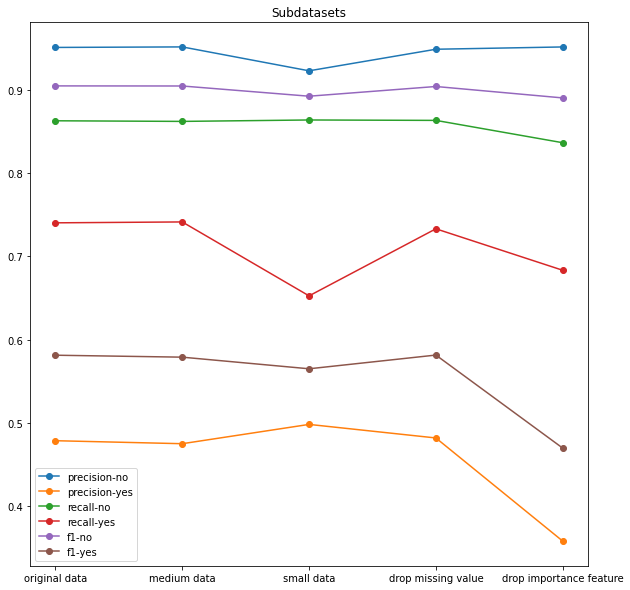

In [ ]:
iter =['original data', 'medium data', 'small data', 'drop missing value', 'drop importance feature']
plt.figure(figsize=(10,10))
plt.plot(iter,precisons0,'o-')
plt.plot(iter, precisons1, 'o-')
plt.plot(iter, recalls0, 'o-')
plt.plot(iter, recalls1, 'o-')
plt.plot(iter, f1s0, 'o-')
plt.plot(iter, f1s1, 'o-')
plt.legend(['precision-no', 'precision-yes', 'recall-no','recall-yes','f1-no','f1-yes'])
plt.title('Subdatasets')